In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [2]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
data.duplicated().sum()

1

In [6]:
data=data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
numerical_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(exclude=np.number)

In [10]:
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numerical_data)

In [11]:
categorical_data_processed = pd.get_dummies(categorical_data)
categorical_data_processed.columns

Index(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [12]:
numerical_data_preprocessed = pd.DataFrame(df_std,columns = numerical_data.columns)

In [13]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed], axis = 1)

In [14]:
data=pre_processed_data

In [15]:
data.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,-7.323984e-17,1.000374,-1.511647,-0.870580,-0.015823,0.838934,1.764921
bmi,1337.0,-6.088789e-16,1.000374,-2.404821,-0.715849,-0.043539,0.661566,3.678759
children,1337.0,1.544514e-17,1.000374,-0.909234,-0.909234,-0.079442,0.750351,3.239729
expenses,1337.0,9.350121e-17,1.000374,-1.004248,-0.704849,-0.321577,0.279089,4.170826
sex_female,1337.0,4.951384e-01,0.500163,0.000000,0.000000,0.000000,1.000000,1.000000
sex_male,1337.0,5.048616e-01,0.500163,0.000000,0.000000,1.000000,1.000000,1.000000
smoker_no,1337.0,7.950636e-01,0.403806,0.000000,1.000000,1.000000,1.000000,1.000000
smoker_yes,1337.0,2.049364e-01,0.403806,0.000000,0.000000,0.000000,0.000000,1.000000
region_northeast,1337.0,2.423336e-01,0.428655,0.000000,0.000000,0.000000,0.000000,1.000000
region_northwest,1337.0,2.423336e-01,0.428655,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:>

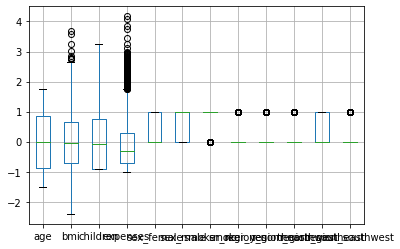

In [17]:
data.boxplot()

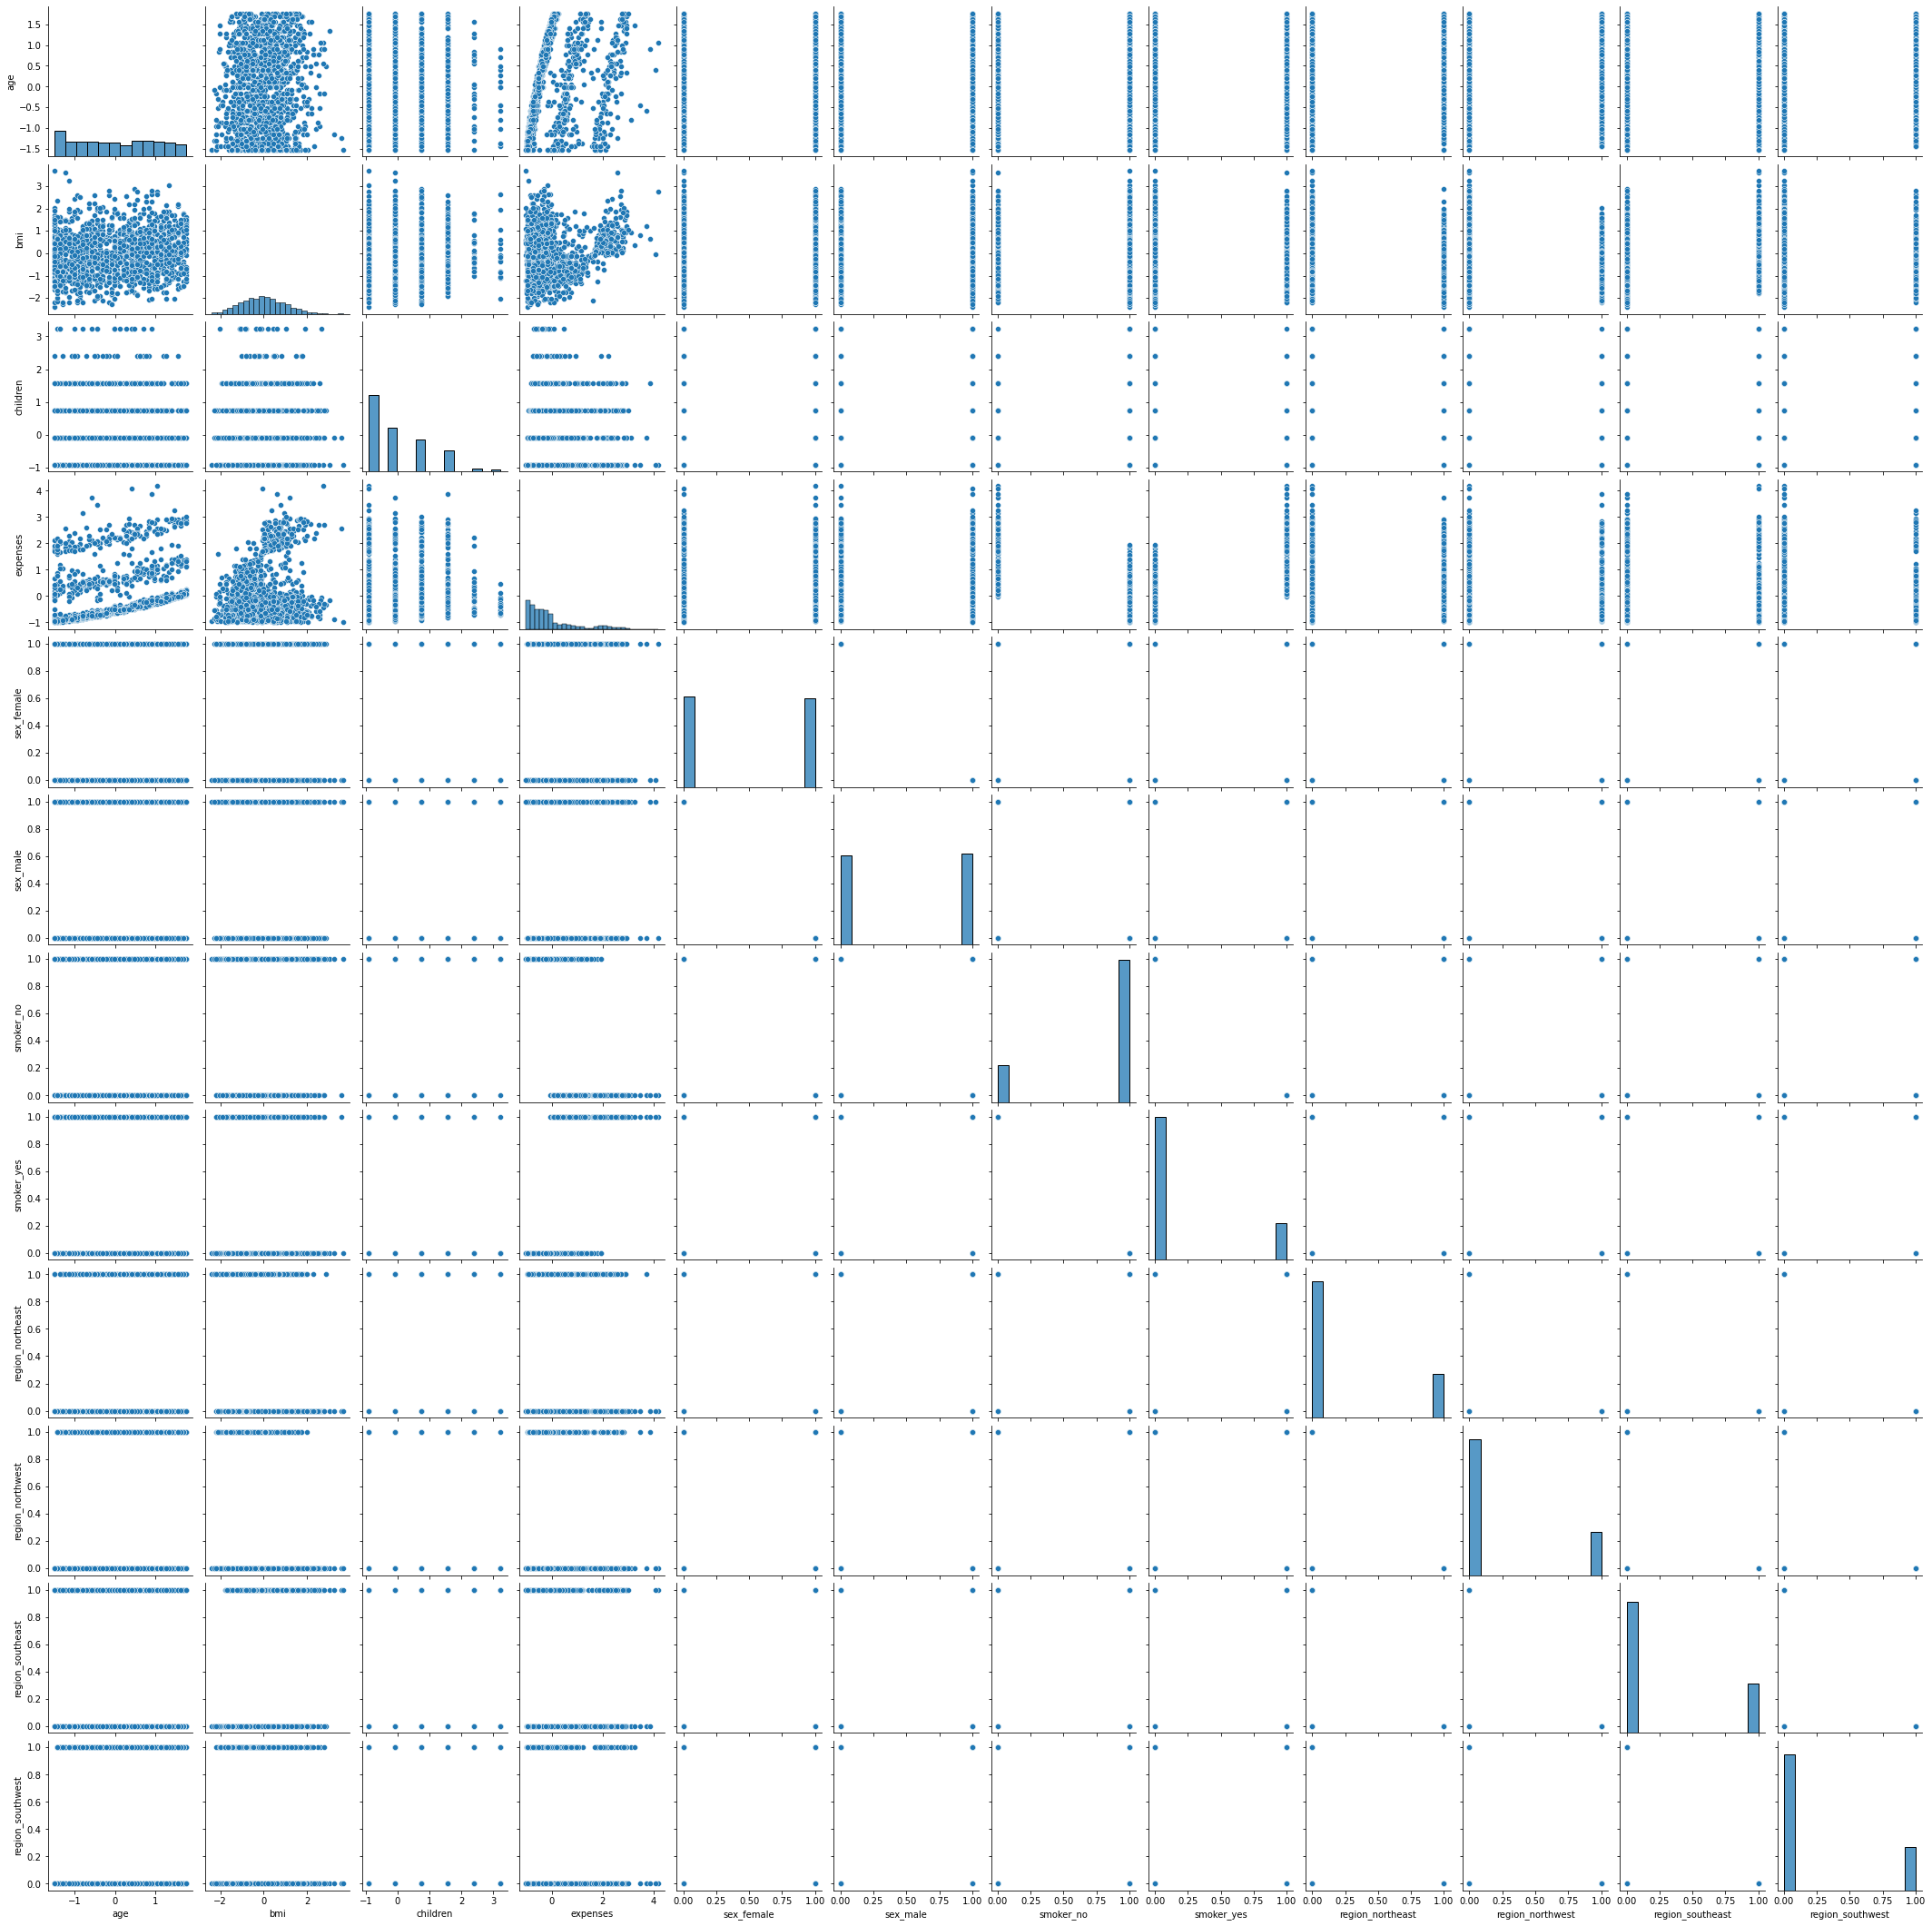

In [18]:
sns.pairplot(data)

<AxesSubplot:>

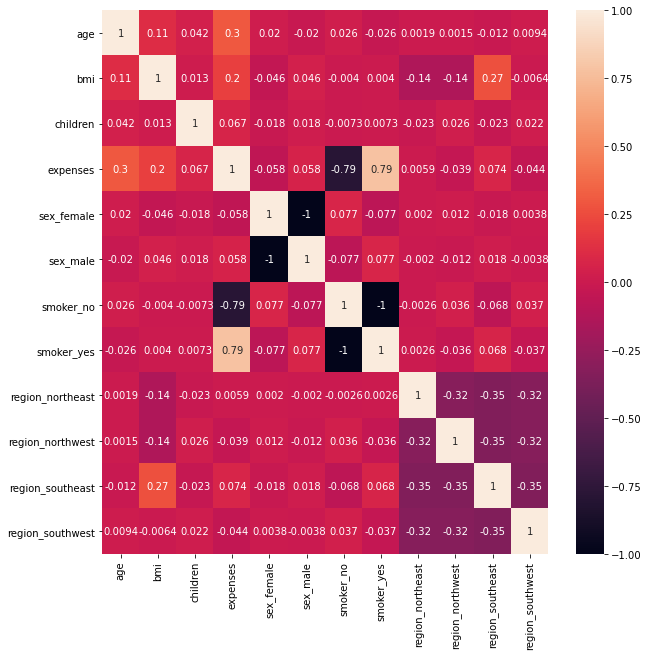

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(),annot=True)

In [20]:
X = data.drop(columns="expenses").select_dtypes(include=np.number)

In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0                age  1.016815
1                bmi  1.106795
2           children  1.004014
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf


C:\Users\Ganesh\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [22]:
X = data.drop(columns="expenses")

In [23]:
y = data["expenses"]

In [24]:
model = LinearRegression()

In [25]:
model.fit(X,y)

LinearRegression()

In [26]:
model.coef_

array([ 0.29774861,  0.17094809,  0.04728637,  0.00534926, -0.00534926,
       -0.98490843,  0.98490843,  0.04841098,  0.01957835, -0.03715448,
       -0.03083485])

In [27]:
model.intercept_

0.5824078552412293

In [28]:
y_pred = model.predict(X)

In [29]:
y_pred

array([ 0.99243167, -0.8109869 , -0.54285095, ..., -0.75262795,
       -0.99383466,  1.96724229])

In [30]:
print("MSE : ",mean_squared_error(y,y_pred))
print("MAE : ",mean_absolute_error(y,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))



MSE :  0.24923626423518191
MAE :  0.3447374133699604
RMSE :  0.49923568005019625


In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

MAPE :  116.99849726021216


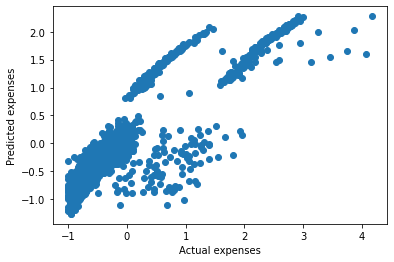

In [33]:
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")

plt.scatter(y, y_pred)

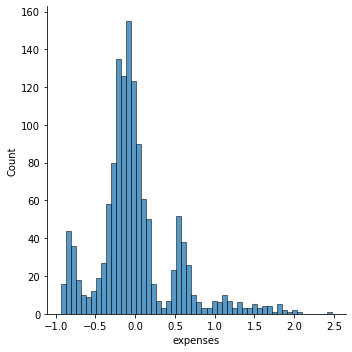

In [34]:
error = y-y_pred
sns.displot(error)

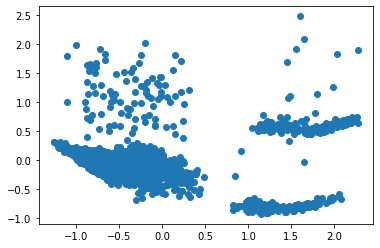

In [35]:
plt.scatter( y_pred, error)

In [36]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [37]:
kf = KFold(n_splits=10)

In [38]:
type(X)

pandas.core.frame.DataFrame

In [39]:
type(y)

pandas.core.series.Series

In [40]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.loc[train_index]
    train_y = y[train_index]
    test_X = X.loc[test_index]
    test_y = y[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print(i, "Fold")
    print("Train_RMSE = ",train_mape)
    print("Test RMSE = ",test_mape)
    
    test_result.append(test_mape)

1 Fold
Train_RMSE =  0.5000539338224694
Test RMSE =  0.49367791206645834
1 Fold
Train_RMSE =  0.49792294833639206
Test RMSE =  0.5117500144294796
1 Fold
Train_RMSE =  0.4989681280658344
Test RMSE =  0.5028783901657053
1 Fold
Train_RMSE =  0.49742369198118713
Test RMSE =  0.5180650014755365
1 Fold
Train_RMSE =  0.4979903331717542
Test RMSE =  0.5134062113226541
1 Fold
Train_RMSE =  0.5069433606888322
Test RMSE =  0.4259541603666694
1 Fold
Train_RMSE =  0.5036798268393993
Test RMSE =  0.45817311043130343
1 Fold
Train_RMSE =  0.49004592548842785
Test RMSE =  0.577211214889707
1 Fold
Train_RMSE =  0.5017875102801861
Test RMSE =  0.4768103478173246
1 Fold
Train_RMSE =  0.4957577412454153
Test RMSE =  0.5333986996965492


In [41]:
np.mean(test_result)

0.5011325062661388

In [42]:
np.std(test_result)

0.039403859853196985

In [44]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

0.5011325062661388

In [45]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
train_pred = model.predict(X_train)

In [49]:
test_pred = model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_train, train_pred))

0.49666299722538787

In [51]:
np.sqrt(mean_squared_error(y_test, test_pred))

0.5097371035523698

In [52]:
r2 = r2_score(y_train, train_pred)

In [53]:
r2

0.7413523365343322